In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
path="maisons.xlsx"
data = pd.read_excel(path)

In [19]:
data

,No,Date,Age,Station,Stores,Latitude,Longitude,Price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
data.drop(columns=["Date", "No"],inplace=True)

In [23]:
# une fonction pour binariser une colonne
# donnee:le dataframe
# cl: le nom de la colonne
def binariser(donnee,cl):
 #Sélectionner la colonne et calculer la moyenne
 moy= donnee[cl].mean()
 print(moy)
 # Remplacer les valeurs supérieures à la moyenne par 1 et le reste par 0
 donnee[cl] =(donnee[cl] >moy).astype(float)
# binariser latitude
binariser(data,"Latitude")
# binariser longitude
binariser(data,"Longitude")

24.969030072463767
121.53336108695655


In [26]:
data

,Age,Station,Stores,Latitude,Longitude,Price
0,32.0,84.87882,10,1.0,1.0,37.9
1,19.5,306.59470,9,1.0,1.0,42.2
2,13.3,561.98450,5,1.0,1.0,47.3
3,13.3,561.98450,5,1.0,1.0,54.8
4,5.0,390.56840,5,1.0,1.0,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,0.0,0.0,15.4
410,5.6,90.45606,9,1.0,1.0,50.0
411,18.8,390.96960,7,1.0,1.0,40.6
412,8.1,104.81010,5,0.0,1.0,52.5


In [28]:
# Séparer les données en entrées et sorties
X =data.iloc[:,:-1] #les caractéristiques (Features)
y =data.iloc[:,-1] #les résultats (classes, Target)

In [32]:
X

,Age,Station,Stores,Latitude,Longitude
0,32.0,84.87882,10,1.0,1.0
1,19.5,306.59470,9,1.0,1.0
2,13.3,561.98450,5,1.0,1.0
3,13.3,561.98450,5,1.0,1.0
4,5.0,390.56840,5,1.0,1.0
...,...,...,...,...,...
409,13.7,4082.01500,0,0.0,0.0
410,5.6,90.45606,9,1.0,1.0
411,18.8,390.96960,7,1.0,1.0
412,8.1,104.81010,5,0.0,1.0


In [34]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Price, Length: 414, dtype: float64

In [36]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
model= LinearRegression()
# Entrainer un modèle de régression linéaire simple(age)
model.fit(X_train[["Age"]],y_train)
# Afficher les coefficients
print("Coefficients regression simple: ", model.coef_, " w0= ", model.intercept_)
# Prédire les résultats des échantillons de test
y_pred=model.predict(X_test[["Age"]])

Coefficients regression simple:  [-0.24182265]  w0=  42.153786219910394


In [40]:
# Evaluation du modèle
print("Régression simple: MSE = ", mean_squared_error(y_test, y_pred))
print("Score R2=",r2_score(y_test,y_pred))

Régression simple: MSE =  176.99384795201448
Score R2= 0.05779840744247955


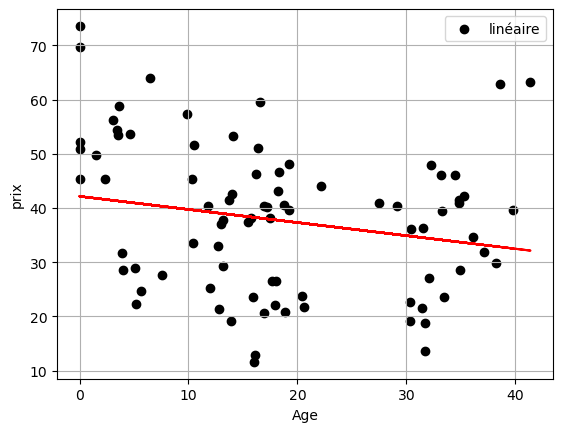

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X_test["Age"],y_test, color="black")
plt.plot(X_test["Age"],y_pred, color='r')
plt.legend(["linéaire"])
plt.xlabel("Age")
plt.ylabel("prix")
plt.grid()
plt.show()


In [58]:
# Regression linéaire multiple
modelRegMulti=LinearRegression()
modelRegMulti.fit(X_train, y_train)
print("Coefficients régression multiple: ",modelRegMulti.coef_," w0= ",
modelRegMulti.intercept_)
yl_predm =modelRegMulti.predict(X_test)
print("Régression multiple:MSE= ",mean_squared_error(y_test,yl_predm))
print("Score R2m:",r2_score(y_test, yl_predm))

Coefficients régression multiple:  [-2.77747733e-01 -4.24249261e-03  1.11055724e+00  6.81361072e+00
  2.93742715e-01]  w0=  39.239427255147646
Régression multiple:MSE=  70.17544135519024
Score R2m: 0.6264310123298013


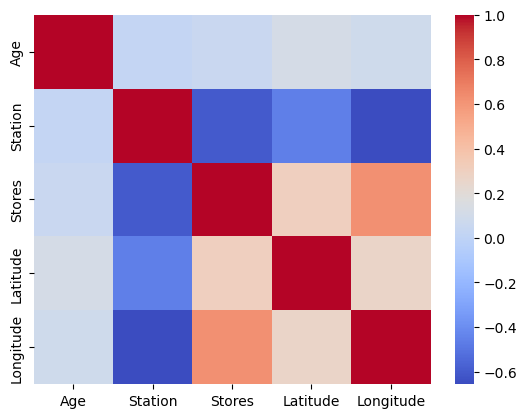

In [60]:
import seaborn as sns
df_corr = X.corr()
ax = sns.heatmap(df_corr,cmap = 'coolwarm')